# Functions by Decla V2
## thx to YU LINGFENG, REN LINGRAN, XUE YUANHUANG, CHEN LIANGRUI

## Content

## import is important !!!
## Sharpe ratio
## Treynor ratio
## Sortino Ratio
## Jensen's Alpha
## Three-factor Alpha
## combine them in a dataframe and bar chart
## mean return and standard deviation of return for the ten industry portfolios
## Plot the efficient frontier (with the riskless asset)
## Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.
## Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model
## SML
## Minimum-Tracking-Error Frontier
## Minimum-Variance Frontier w/o Short Sales
## Stochastic Discount Factor
## Behavioural Finance
## OLS (e.g. Three factor)

## import is important !!!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import random
import statsmodels.api as sm
%matplotlib inline

In [2]:
df_Market = pd.read_excel("Market_Portfolio.xlsx", index_col="Date")
df = pd.read_excel("Industry_Portfolios.xlsx", index_col="Date")
df_Rf = pd.read_excel("Risk_Factors.xlsx", index_col="Date")

D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


## Sharpe ratio
## <font color = purple>Sharpe ratio represents risk premium per unit of total risk:
### <font color = purple>Includes idiosyncratic risk, which penalises individual investments and non-diversified portfolios

### <font color = purple>Implicitly assumes normal returns, so cannot distinguish between asymmetric return distributions with same variance but different skewness

In [3]:
# Sharpe ratio
def Sharpe_ratio(df,rf):#rf can be a constant or a column such as df_rf['Rf']
    column_names = df.columns.tolist()
#     column_names = column_names[1:-1]  #you should check whether your Date is also a column
    srlist=[]
    for m in range(len(column_names)):
        Yi = df[f"{column_names[m]}"] - rf
        Y_mean = Yi.mean()
        Y_std = Yi.std() 
        Si = Y_mean/Y_std
        srlist.append(Si)
    return srlist

## Treynor ratio
## <font color = green>Treynor ratio represents risk premium per unit of market risk, which ignores idiosyncratic risk as well as other types of systematic risk

In [4]:
#ols_estimate_b
def ols_estimate_b(df,rf):#rf can be a constant or a column such as df_rf['Rf']
    Xi = df_Rf["Rm-Rf"] # you should check your dfs' name
    X_mean = Xi.mean()
    column_names = df.columns.tolist()
    blist =[]
#     column_names = column_names[1:-1]  #you should check whether your Date is also a column
    for m in range(len(column_names)):
        Yi = df[f"{column_names[m]}"] -rf
        Xi =list(Xi)
        Y_mean = Yi.mean()
        Yi =list(Yi)
        XiYi_sum =0
        Xi_square_sum =0 
        for j in range(len(Xi)):
            XiYi_sum += Xi[j]*Yi[j]
            Xi_square_sum += Xi[j]**2
        beta_ols = (XiYi_sum/len(Xi) - X_mean*Y_mean)/(Xi_square_sum/len(Xi)-X_mean**2)
        blist.append(beta_ols)
    return blist

In [5]:
# Treynor_ratio
def Treynor_ratio(df,rf):
    trlist=[]
    column_names = df.columns.tolist()
#     column_names = column_names[1:-1]  #you should check whether your Date is also a column
    for m in range(len(column_names)):
        Yi = df[f"{column_names[m]}"] - rf
        Y_mean = Yi.mean()
        beta = blist[m]
        Ti = Y_mean/beta
        trlist.append(Ti)
    return trlist

## Sortino Ratio
## <font color = orange>Sortino ratio represents risk premium per unit of downside risk, which can distinguish between asymmetric return distributions with same variance but different skewness

In [6]:
def Sortino_Ratio(df,rf):
    column_names = df.columns.tolist()
#     column_names = column_names[1:-1]  #you should check whether your Date is also a column
    def semi_variance(x):
        Yi = df[f"{column_names[x]}"] - rf
        Y_min = Yi.apply(lambda y: min(y, 0))
        Y_square = Y_min ** 2
        sv = Y_square/120
        return sv
    def Sortino(x):
        Yi = df[f"{column_names[x]}"] - rf
        Y_mean = Yi.mean()
        sv = semi_variance(x).sum()
        Sti = Y_mean / (sv**0.5)
        return Sti
    sorlist=[]
    for m in range(len(column_names)):
        sorlist.append(Sortino(m))
    return sorlist

## Jensen's Alpha

In [7]:
def Jensens_Alpha(df,rf):
    jalist=[]
    column_names = df.columns.tolist()
#     column_names = column_names[1:-1]  #you should check whether your Date is also a column
    Xi = df_Market["Market"] - rf  # you should check your dfs' name
    X_mean = Xi.mean()
    for m in range(len(column_names)):
        Yi = df[f"{column_names[m]}"] -rf
        Y_mean = Yi.mean()
        beta = blist[m]
        Alphai = Y_mean - beta * X_mean
        jalist.append(Alphai)
    return jalist

## Three-factor Alpha

In [8]:
#Three-factor Alpha
def Threefactor_Alpha(df,rf):
    column_names = df.columns.tolist()
#     column_names = column_names[1:-1]  #you should check whether your Date is also a column
    def Threefactor(x):
        Y = df[f"{column_names[x]}"] - rf['Rf'] #you should do this by yourself
        X1 = rf['Rm-Rf']
        X2 = rf['SMB']
        X3 = rf['HML']
        X = sm.add_constant(pd.concat([X1, X2, X3], axis=1))
        model = sm.OLS(Y, X)
        results = model.fit()
        alpha = results.params['const']
        return alpha
    tfalist=[]
    for m in range(len(column_names)):
        tfalist.append(Threefactor(m))
    return tfalist

## combine them in a dataframe and bar chart

In [9]:
srlist = Sharpe_ratio(df,df_Rf["Rf"])
blist = ols_estimate_b(df,df_Rf["Rf"])
trlist = Treynor_ratio(df,df_Rf["Rf"])
jalist = Jensens_Alpha(df,df_Rf["Rf"])
sorlist = Sortino_Ratio(df,df_Rf["Rf"])
tfalist = Threefactor_Alpha(df,df_Rf)

In [10]:
column_names = df.columns.tolist()
# column_names = column_names[1:-1]  #you should check whether your Date is also a column
data = {'portfolio': column_names,
        'Sharpe ratio': srlist,
        'Sortino Ratio': sorlist,
        'Treynor_ratio':trlist,
        'Jensens Alpha':jalist,
        'Three-factor Alpha':tfalist}
df = pd.DataFrame(data)
df

,portfolio,Sharpe ratio,Sortino Ratio,Treynor_ratio,Jensens Alpha,Three-factor Alpha
0,NoDur,0.231099,0.350804,1.186372,0.369717,0.386704
1,Durbl,0.072356,0.111967,0.367463,-0.417903,-0.474342
2,Manuf,0.166616,0.241260,0.758251,0.160494,0.153285
3,Enrgy,0.181708,0.273612,1.143330,0.504485,0.523007
4,HiTec,0.118552,0.170620,0.564295,-0.064024,-0.065979
5,Telcm,0.169064,0.244940,0.836363,0.194348,0.200724
6,Shops,0.191753,0.293032,0.951258,0.274093,0.255941
7,Hlth,0.172529,0.270294,0.971435,0.236968,0.257472
8,Utils,0.210948,0.290044,1.452334,0.446523,0.474411
9,Other,0.064693,0.087351,0.299781,-0.387508,-0.404412


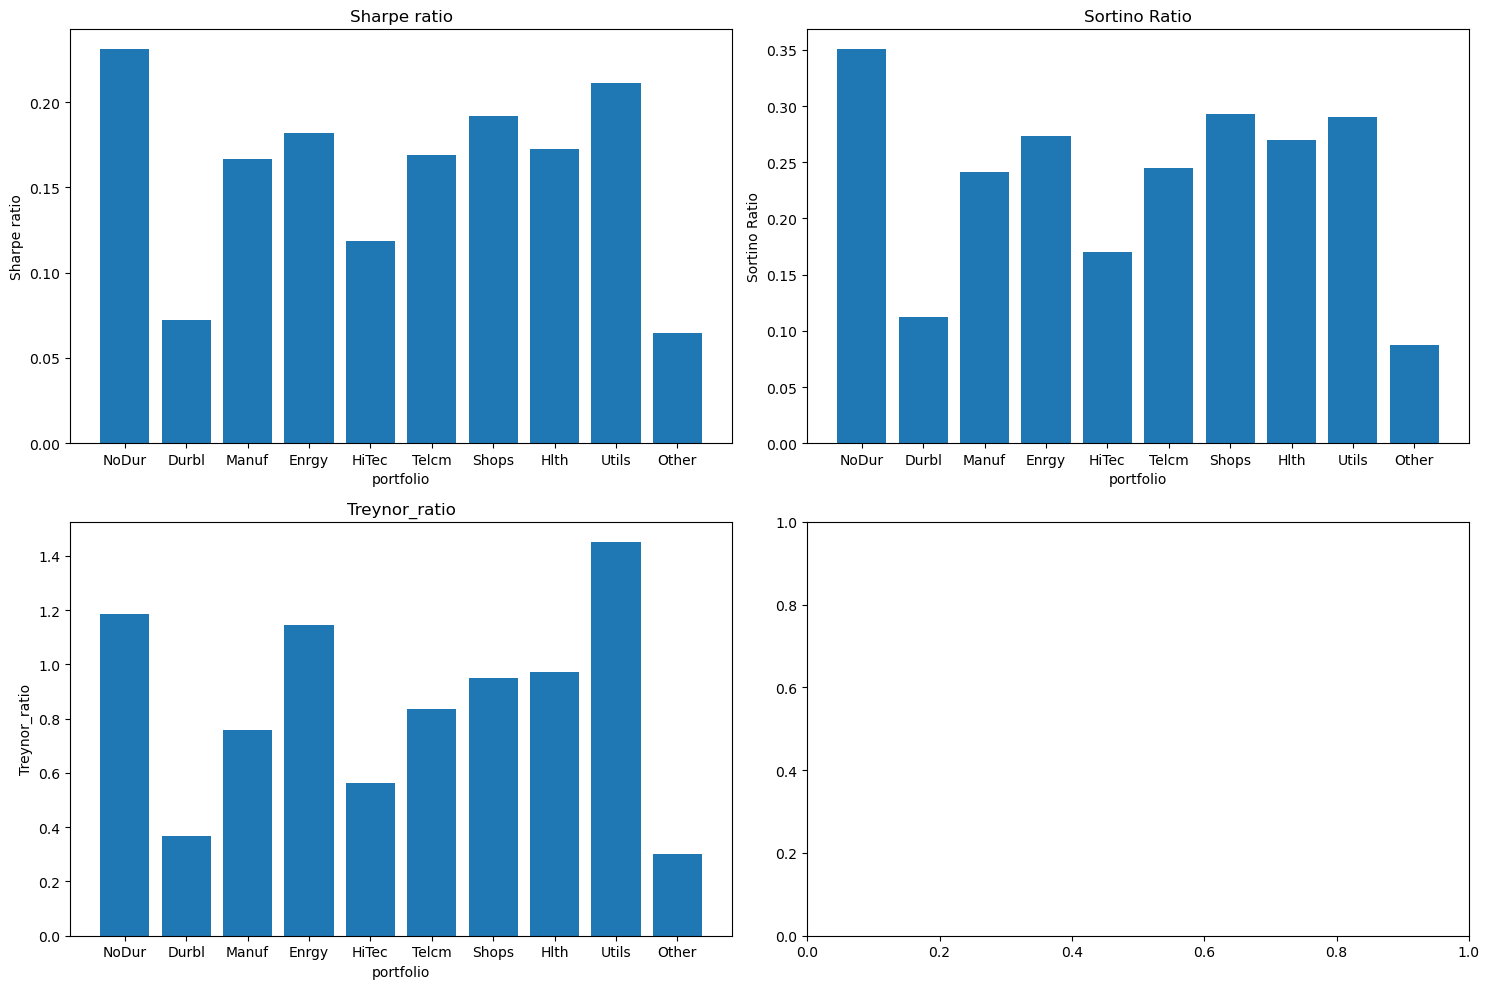

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].bar(df['portfolio'], df['Sharpe ratio'])
axes[0, 0].set_title('Sharpe ratio')
axes[0, 0].set_xlabel('portfolio')
axes[0, 0].set_ylabel('Sharpe ratio')

axes[0, 1].bar(df['portfolio'], df['Sortino Ratio'])
axes[0, 1].set_title('Sortino Ratio')
axes[0, 1].set_xlabel('portfolio')
axes[0, 1].set_ylabel('Sortino Ratio')

axes[1, 0].bar(df['portfolio'], df['Treynor_ratio'])
axes[1, 0].set_title('Treynor_ratio')
axes[1, 0].set_xlabel('portfolio')
axes[1, 0].set_ylabel('Treynor_ratio')

plt.tight_layout()
plt.show()

## mean return and standard deviation of return for the ten industry portfolios
## <font color = red> the economic significance and relevance of the minimum-variance frontier to an investor:
### <font color = red> Minimum-variance frontier represents outermost envelope of attainable portfolios ⇒ no attainable portfolio exists on the left of the minimum-variance frontier.

In [12]:
df =  pd.read_excel("Industry_Portfolios.xlsx") 
mean_series=df.mean(axis=0)
size = len(df)
var_series= df.var(axis=0)*(size/(size-1))
std_series= df.std(axis=0)*(size/(size-1))
result_df = pd.DataFrame({'Mean': mean_series[1:], 'Std': std_series[1:]})
result_df

D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Mean,Std
NoDur,0.902833,3.373772
Durbl,0.733333,8.432120
Manuf,1.012833,5.354894
Enrgy,1.231167,6.132629
HiTec,0.766250,5.426411
Telcm,0.881417,4.485664
Shops,0.916333,4.128188
Hlth,0.783833,3.818997
Utils,0.907167,3.732871
Other,0.489083,5.629363


## Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios.
## <font color = cyan> Briefly explain the economic significance and relevance of the tangency portfolio to an investor.
## <font color = cyan>Efficient frontier consists of portfolios with highest potential reward for given amount of risk ⇒ risk-averse investor must invest in (optimal) portfolio on efficient frontier to maximise expected utility.

In [13]:
matrix=df.iloc[:,1:].to_numpy()
V = np.cov(matrix,rowvar=False)
V_inverse = np.linalg.inv(V)
V@V_inverse

array([[ 1.00000000e+00,  3.78403177e-16, -6.42185591e-16,
        -1.83475150e-16,  5.82657829e-17,  4.50490563e-16,
        -2.58554406e-16, -2.64037249e-16, -2.22044605e-16,
        -4.44089210e-16],
       [ 3.70013581e-16,  1.00000000e+00, -1.35823347e-15,
        -3.00740116e-16,  1.58490861e-16,  1.78603045e-16,
         2.72081366e-16, -4.24813098e-16, -4.44089210e-16,
         1.77635684e-15],
       [ 1.65842565e-15,  3.40356173e-16,  1.00000000e+00,
        -2.55903152e-16,  5.74711768e-17,  4.19888310e-16,
        -5.20178268e-16, -1.37819867e-16, -4.44089210e-16,
         0.00000000e+00],
       [ 4.95288116e-16,  1.94891786e-16, -9.05916253e-16,
         1.00000000e+00,  3.54152173e-18,  7.55247506e-17,
        -1.29359898e-16, -2.43190569e-16, -4.44089210e-16,
         0.00000000e+00],
       [ 1.35225508e-15,  3.74505646e-16, -9.00733501e-16,
        -7.93651045e-17,  1.00000000e+00,  2.13138210e-16,
        -2.93513585e-16, -2.99129881e-16, -2.22044605e-16,
         0.

In [14]:
R_prime=mean_series[1:].to_numpy()
R = R_prime.T
e_prime = np.ones(len(df.columns)-1)
e = e_prime.T
alpha = R_prime @ V_inverse @ e
zeta = R_prime @ V_inverse @ R
delta = np.dot(np.dot(e_prime,V_inverse),e)
print(alpha,zeta,delta)

0.1379432386993189 0.19640858464482275 0.1373875973567117


In [15]:
Rmv = alpha/delta
Rp = np.arange(0,2.05,0.05)
var = 1/delta + (delta/(zeta*delta - alpha**2)) *((Rp- Rmv)**2)
stdv = var**0.5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


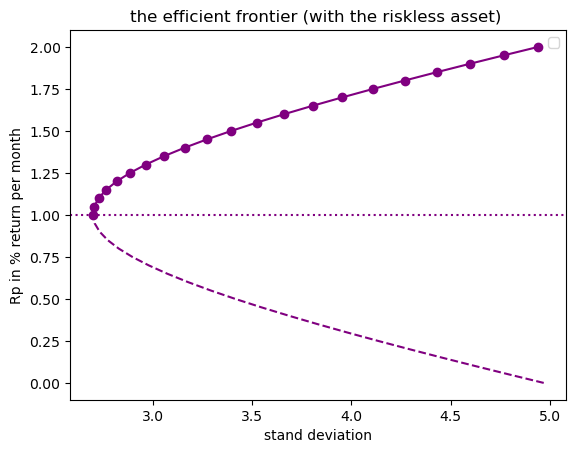

In [16]:
part = (len(stdv))//2
plt.plot(stdv[:part+1],Rp[:part+1],color="purple",linestyle="--")
plt.plot(stdv[part:],Rp[part:],color="purple",marker="o",linestyle="-")
plt.axhline(y=1, color="purple", linestyle=":")

plt.title("the efficient frontier (with the riskless asset) ")
plt.xlabel('stand deviation')
plt.ylabel('Rp in % return per month')
plt.legend()
plt.show()

## Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.
## <font color = gold> Briefly explain the economic significance and relevance of the tangency portfolio to an investor.:
## <font color = gold> Tangency portfolio has the highest possible Sharpe ratio.

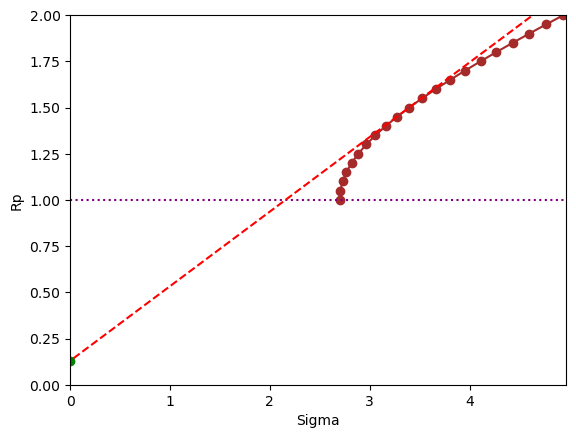

In [17]:
Rf =0.13
sigma_p = (Rp-Rf)/((zeta- 2*alpha *Rf +delta *(Rf**2))**0.5)

plt.plot(stdv[part:],Rp[part:],color="Brown",marker="o",linestyle="-")
plt.axhline(y=1, color="purple", linestyle=":")

plt.scatter(0, 0.13, color='green', marker='o', label='Point (0, 1.13)')

plt.plot(sigma_p,Rp,color="red",linestyle="--")

plt.xlim([0, max(stdv)])
plt.ylim([0, max(Rp)])

plt.xlabel('Sigma')
plt.ylabel('Rp')

plt.show()

In [18]:
#sharpe ratio
sharp_ratio =((zeta- 2*alpha *Rf +delta *(Rf**2))**0.5)
sharp_ratio

0.4035655993495088

In [19]:
w_star = ((delta * sharp_ratio )/(zeta*delta - alpha**2))*V_inverse@R+\
        ((zeta-alpha* sharp_ratio )/(zeta*delta-alpha**2)*V_inverse@e)
w_star

array([ 1.86399839, -0.45905457,  0.21164917,  0.25645095, -0.49247786,
       -0.46108769,  2.3354219 ,  0.42838996,  0.91668387, -1.20820744])

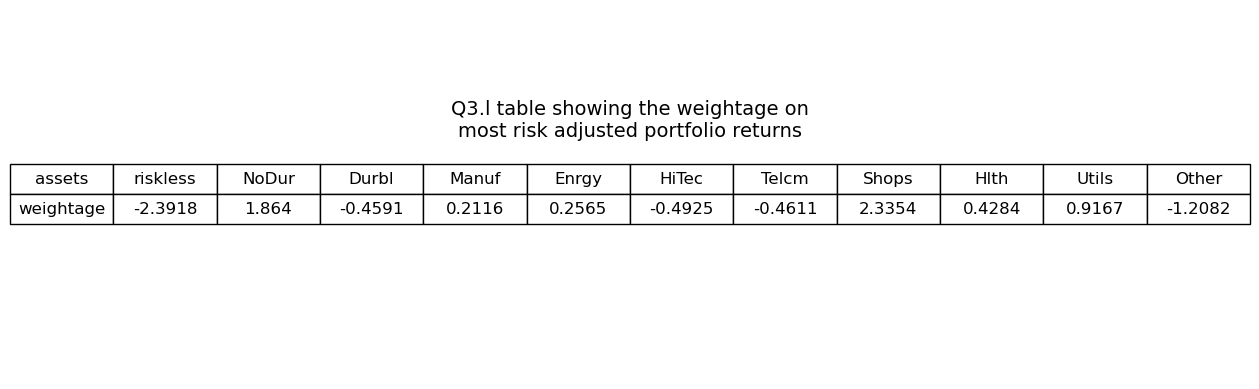

In [20]:
col_list = list(df.columns)
num_sample = len(df)
mean_return = np.mean(matrix,axis=0)
variance_return = np.var(matrix, axis=0) * (num_sample / (num_sample - 1))
std_return = np.array([np.sqrt(x) for x in variance_return])
# Create a figure and axis
fig,ax = plt.subplots()
# Create the table
table_data = []
header_row = ['assets','riskless']
header_row.extend(col_list[1:])
table_data.append(header_row)
weight_row = ['weightage', np.round(1-w_star.sum(),decimals=4)] +\
        list(np.round(w_star, decimals=4))
table_data.append(weight_row)
# Add a label above the table
label_text = "Q3.l table showing the weightage on\nmost risk adjusted portfolio returns"
ax.text(0.5,0.7, label_text, ha='center' , va='center' , fontsize=14)
table = ax.table(cellText=table_data, loc='center', cellLoc='center')
# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.5, 1.8) # Adjust the height of the rows
# Remove axis
ax.axis('off')
# Show the table
plt.show()

## Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model
## <font color = brown>the economic significance of the intercept and slope coefficients:
### <font color = brown> Intercept coefficient from market model regression shows pricing error relative to CAPM.
### <font color = brown> Slope coefficient from market model regression shows degree of exposure to market risk.

In [21]:
df =  pd.read_excel("Industry_Portfolios.xlsx") 
df_Market = pd.read_excel("Market_Portfolio.xlsx") 
column_names = df.columns.tolist()
column_names = column_names[1:]  
Rf = 0.13
def ols_estimate_b(x):
    Xi = df_Market["Market"] - Rf
    Yi = df[f"{x}"] -Rf
    X_mean = Xi.mean()
    Y_mean = Yi.mean()
    
    XiYi_sum =0
    Xi_square_sum =0 
    for j in range(len(Xi)):
        XiYi_sum += Xi[j]*Yi[j]
        Xi_square_sum += Xi[j]**2
    beta_ols = (XiYi_sum/len(Xi) - X_mean*Y_mean)/(Xi_square_sum/len(Xi)-X_mean**2)
    return beta_ols
def ols_estimate_a(x,y):
    alpha_ols = (df[f"{column_names[y]}"] -Rf).mean() - (df_Market["Market"] - Rf).mean() * x
    return alpha_ols
blist =[]
alist =[]
for m in range(len(column_names)):
    blist.append(ols_estimate_b(column_names[m]))
    alist.append(ols_estimate_a(ols_estimate_b(column_names[m]),m))
data = {'portfolio': column_names,
        'beta': blist,
        'alpha': alist}
df = pd.DataFrame(data)
df
##:( 
#emmm u may want to say:"WTF is this?"
##well I can only tell that it do works, cuz at that time I don't know how to use OLS directly. QAQ 

D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,portfolio,beta,alpha
0,NoDur,0.652647,0.369443
1,Durbl,1.648536,-0.415599
2,Manuf,1.169846,0.159771
3,Enrgy,0.969850,0.501719
4,HiTec,1.132969,-0.064020
5,Telcm,0.900729,0.194691
6,Shops,0.826492,0.275492
7,Hlth,0.673036,0.237841
8,Utils,0.538086,0.444585
9,Other,1.207309,-0.387135


## SML
## <font color = pink>the economic significance of the SML: SML shows that all appropriately-priced assets have same Treynor ratio ⇒ assets that lie above SML are underpriced, while assets that lie below SML are overpriced.

In [22]:
df =  pd.read_excel("Industry_Portfolios.xlsx") 
df_Market = pd.read_excel("Market_Portfolio.xlsx") 
column_names = df.columns.tolist()
column_names = column_names[1:]  
rlist = []
for i in range(len(column_names)):
    rlist.append(df[f"{column_names[i]}"].mean())
betam =1 
Rm =df_Market["Market"].mean()
blist.append(betam)
rlist.append(Rm)

Xi_2 = blist
Yi_2 = rlist
X_total_2 = sum(Xi_2) 
Y_total_2 = sum(Yi_2)
X_mean_2 = X_total_2/ len(Xi_2)
Y_mean_2 = Y_total_2/ len(Yi_2)
    
XiYi_sum_2 =0
Xi_square_sum_2 =0 
for j in range(len(Xi_2)):
    XiYi_sum_2 += Xi_2[j]*Yi_2[j]
    Xi_square_sum_2 += Xi_2[j]**2
beta_ols_2 = (XiYi_sum_2/len(Xi_2) - X_mean_2*Y_mean_2)/(Xi_square_sum_2/len(Xi_2)-X_mean_2**2)
alpha_ols_2 = Y_mean_2 - beta_ols_2 * X_mean_2
    
print(alpha_ols_2,beta_ols_2 )

1.0327683682657047 -0.1854674583657318


D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


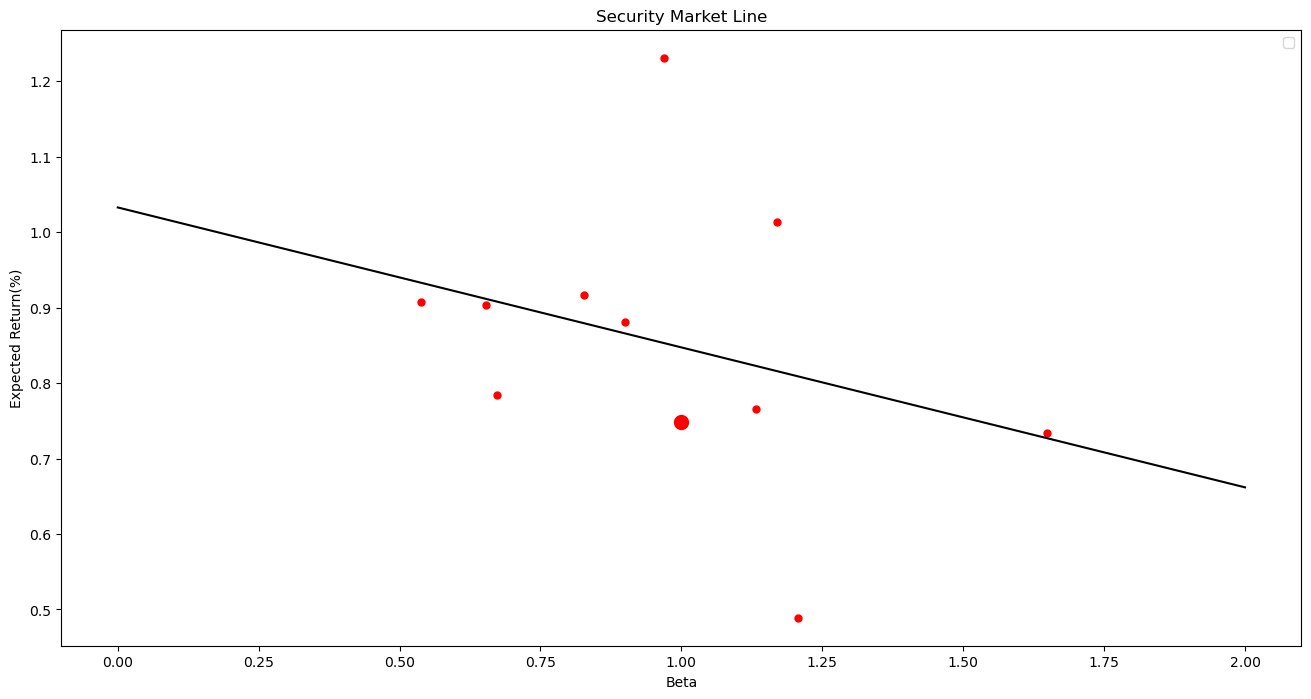

In [23]:
beta_range =  np.arange(0,3)
plt.figure(figsize=(16, 8))
plt.plot(beta_range,beta_range*(beta_ols_2) +alpha_ols_2,color="black")

for i in range(len(Xi_2)-1):
    plt.scatter(Xi_2[i],Yi_2[i],color='red',marker='.',s=100)
    i +=1
plt.scatter(Xi_2[10],Yi_2[10],color='red',marker='o',s=100)

plt.title("Security Market Line")
plt.xlabel('Beta')
plt.ylabel('Expected Return(%)')
plt.legend()
plt.show()

## Minimum-Tracking-Error Frontier
> 1.Let the market return be the target return. Estimate the expected deviation from market return, for the ten industry portfolios

In [24]:
df_market_portfolio = pd.read_excel("Market_Portfolio.xlsx", index_col="Date")
df_industry_portfolios = pd.read_excel("Industry_Portfolios.xlsx", index_col="Date")

df = pd.merge(df_industry_portfolios, df_market_portfolio, right_index=True, left_index=True, how = "inner")
lst_industry_names = list(df_industry_portfolios.columns)
df1 = df.copy()

lst_excess_names = []
for name in lst_industry_names:
    col = name + "-Rm"
    lst_excess_names.append(col)
    df1[col] = df1[name] - df1["Market"]
se_excess_returns = df1[lst_excess_names].apply(np.mean)
se_excess_returns

D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


NoDur-Rm    0.154750
Durbl-Rm   -0.014750
Manuf-Rm    0.264750
Enrgy-Rm    0.483083
HiTec-Rm    0.018167
Telcm-Rm    0.133333
Shops-Rm    0.168250
Hlth-Rm     0.035750
Utils-Rm    0.159083
Other-Rm   -0.259000
dtype: float64

>2.Also estimate the covariance matrix of return deviations, for the ten industry portfolios:

In [25]:
df_covs = df1[lst_excess_names].cov()

>3.Plot the minimum-tracking-error frontier generated by the ten industry portfolios.

This graph must have expected (monthly) return deviation on the vertical axis vs (monthly) tracking error on the horizontal axis.\
This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).\
Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier.

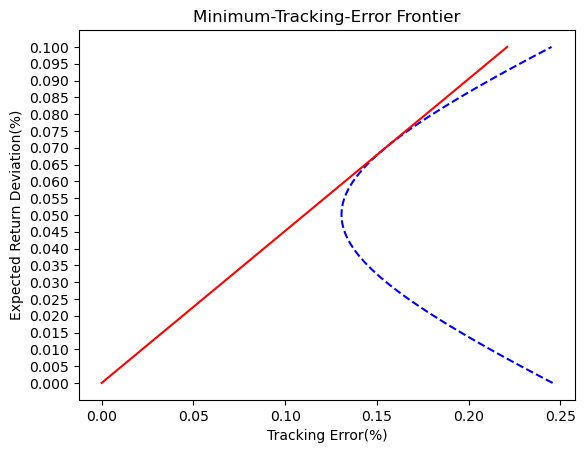

In [26]:
V = df_covs.copy()
V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)

R = se_excess_returns
e = pd.Series([1]*10)
e.index = R.index

alpha = R.dot(V_inv).dot(e)
zeta = R.dot(V_inv).dot(R)
delta = e.dot(V_inv).dot(e)

R_mv = alpha/delta

#from 0% to 0.1% on the vertical axis
R_p = np.linspace(0, 0.1, 100) 

sigma_p = np.sqrt(1/delta + delta/(zeta*delta-alpha**2)*(R_p-R_mv)**2)
#plot the line starting from the origin
R_f = 0
#R_p = np.linspace(0, 0.1, 100) 
R_p_riskless = np.linspace(0, 0.1, 100) 

#R_p = R_mv + np.sqrt((sigma_p**2-1/delta)*(zeta*delta-alpha**2)/delta)
sigma_p_riskless = (R_p_riskless-R_f)/np.sqrt(zeta - 2*alpha*R_f + delta*(R_f**2))

plt.plot(sigma_p, R_p, color='blue', linestyle='--')
plt.plot(sigma_p_riskless, R_p_riskless, color='red', linestyle='-')

plt.yticks(np.arange(0, 0.105, 0.005))
plt.xlabel('Tracking Error(%)')
plt.ylabel('Expected Return Deviation(%)')
plt.title('Minimum-Tracking-Error Frontier')
plt.show() 

>4 Calculate the information ratio and portfolio weights for the "tangency" portfolio

In [27]:
np.sqrt(zeta - 2*alpha*R_f + delta*R_f**2)

0.4524875396199334

In [28]:
R_tg = (alpha*R_f - zeta)/(delta*R_f - alpha)
R_tg
a = (zeta*V_inv.dot(e)-alpha*V_inv.dot(R))/(zeta*delta-alpha**2)
b = (delta*V_inv.dot(R) - alpha*V_inv.dot(e))/(zeta*delta-alpha**2)
w_star = a + b*R_tg

w_star

NoDur-Rm    0.052634
Durbl-Rm    0.000153
Manuf-Rm    0.137627
Enrgy-Rm    0.087032
HiTec-Rm    0.179353
Telcm-Rm    0.071074
Shops-Rm    0.106884
Hlth-Rm     0.102776
Utils-Rm    0.040162
Other-Rm    0.222304
dtype: float64

## Minimum-Variance Frontier w/o Short Sales
>1.Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. Portfolio weights will be limited to the range [0, 1].

Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one. Use the normalised w to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 1e5 data points.

Plot the data points with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

In [29]:
# se_w = pd.Series(np.random.rand(10))
# se_stand_w = se_w/sum(se_w)
# se_stand_w.index = lst_industry_names
# df_datapoints = pd.DataFrame(columns=["return", "std"])
# for i in range(int(1e5)):
#     se_w = pd.Series(np.random.rand(10))
#     se_stand_w = se_w/sum(se_w)
#     se_stand_w.index = lst_industry_names
    
#     profolio_std = np.sqrt(se_stand_w.dot(df1[lst_industry_names].cov()).dot(se_stand_w))
    
#     profolio_return = se_stand_w.dot(df1[lst_industry_names].apply(np.mean))
#     df_datapoints.loc[len(df_datapoints)] = [profolio_return, profolio_std]
# df_datapoints

In [30]:
# #improvement
# num_rows = int(1e5)
# num_cols = 10

# #get 1e5*10 standarized w
# random_matrix = np.random.rand(num_rows, num_cols)
# random_matrix = pd.DataFrame(random_matrix).T
# random_matrix.index = lst_industry_names
# w = random_matrix.apply(lambda x: x/np.sum(x))

# cov = df1[lst_industry_names].cov()
# R = df1[lst_industry_names].apply(np.mean)

# lst_variance = []
# lst_mean = []

# for i in range(len(w.columns)):
#     #var = w*cov*w
#     lst_variance.append(w[i].dot(cov).dot(w[i]))
#     #mean = w*R
#     lst_mean.append(w[i].dot(R))
# lst_std = np.sqrt(lst_variance)
# plt.scatter(lst_std, lst_mean)
# plt.xlabel("Standard Deviation of Return(%)")
# plt.ylabel("Expected Return(%)")
# plt.title("Minimum-Variance Frontier(No short Sales)")
# plt.show()

>2.Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.

Plot the new data points (on a separate graph) with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

In [31]:
# df_datapoints1 = pd.DataFrame(columns=["return", "std"])
# for i in range(int(1e5)):
#     se_w = pd.Series(1/np.random.rand(10))
#     se_stand_w = se_w/sum(se_w)
#     se_stand_w.index = lst_industry_names
    
#     profolio_std = np.sqrt(se_stand_w.dot(df1[lst_industry_names].cov()).dot(se_stand_w))
    
#     profolio_return = se_stand_w.dot(df1[lst_industry_names].apply(np.mean))
#     df_datapoints1.loc[len(df_datapoints1)] = [profolio_return, profolio_std]
# df_datapoints1

In [32]:
# #improvement
# num_rows = int(1e5)
# num_cols = 10

# #get 1e5*10 standarized w
# random_matrix = 1/np.random.rand(num_rows, num_cols)
# random_matrix = pd.DataFrame(random_matrix).T
# random_matrix.index = lst_industry_names
# w = random_matrix.apply(lambda x: x/np.sum(x))

# cov = df1[lst_industry_names].cov()
# R = df1[lst_industry_names].apply(np.mean)

# lst_variance = []
# lst_mean = []

# for i in range(len(w.columns)):
#     #var = w*cov*w
#     lst_variance.append(w[i].dot(cov).dot(w[i]))
#     #mean = w*R
#     lst_mean.append(w[i].dot(R))
# lst_std = np.sqrt(lst_variance)
# plt.scatter(lst_std, lst_mean)
# plt.xlabel("Standard Deviation of Return(%)")
# plt.ylabel("Expected Return(%)")
# plt.title("Minimum-Variance Frontier(No short Sales)")
# plt.show()

## Stochastic Discount Factor
### <font color = grey>Suppose that consumption growth has lognormal distribution with the possibility of rare disasters:
### <font color = grey>Here ε is a standard normal random variable, while ν is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).
### <font color = grey>Simulate ε with (at least) 104 random draws from standard normal distribution, and simulate ν with (at least) 104 random draws from standard uniform distribution.

In [33]:
list_g = []
for i in range(10000):
    yipusong = float(random.uniform(0, 1))
    if yipusong > 0.017:
        nu=0
    else:
        nu=np.log(0.65)
    ln_g = 0.02 + 0.02*yipusong + nu
    list_g.append(np.exp(ln_g))
len(list_g)

10000

### <font color = grey>Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility:
### <font color = grey>Repeat this process for values of γ in the range from 1 to 4, in increments of 0.1 (or less). (Note that you can reuse the same simulated distribution of consumption growth for all values of γ). 

In [34]:
gama = np.arange(1,4.1,0.1)
list_m_s = []
for j in range(len(gama)):
    M = 0.99 *(list_g**(-gama[j]))
    m_s = (M.std())/(M.mean())
    list_m_s.append(m_s)
list_m_s

[0.0738971711473723,
 0.08312180709619423,
 0.09273538914961485,
 0.10275330582171822,
 0.11319144964637955,
 0.12406622452293857,
 0.13539455223437272,
 0.14719387802575293,
 0.1594821751225917,
 0.1722779480602765,
 0.18560023468716122,
 0.19946860669511757,
 0.21390316852247465,
 0.22892455446537982,
 0.2445539238247643,
 0.2608129539073993,
 0.2777238306910756,
 0.29530923695586847,
 0.31359233767588096,
 0.332596762458962,
 0.35234658481582865,
 0.3728662980349817,
 0.39418078743599244,
 0.4163152987713787,
 0.43929540254662935,
 0.4631469540292234,
 0.4878960487210112,
 0.513568973074358,
 0.5401921502412962,
 0.5677920806569017,
 0.5963952772735079]

### <font color = grey>Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

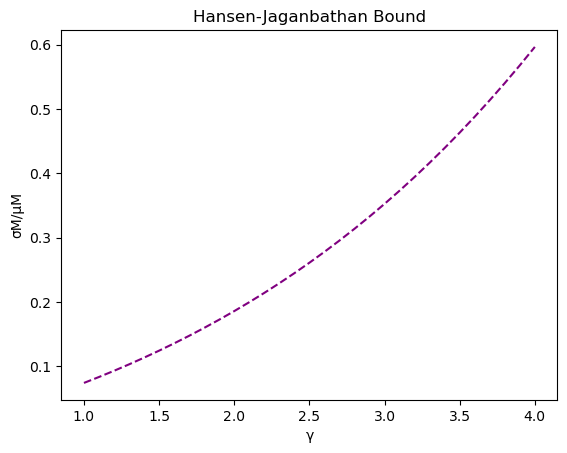

In [35]:
plt.plot(gama,list_m_s,color="purple",linestyle="--")

plt.xlabel('γ')
plt.ylabel('σM/μM')
plt.title('Hansen-Jaganbathan Bound')

plt.show()

### <font color = grey>Find the smallest value of γ (in your data) for which σM/μM > 0.4.
### <font color = grey>Explain (in words, without using any mathematical  equations or formulas) the economic significance of this result:
    H–J bound: volatility ratio of pricing kernel must exceed Sharpe ratio of 0.4 for US stock market
    For investor with power utility of consumption, investor's coefficient of relative risk aversion (γ) affects volatility of pricing kernel ⇒ H–J bound sets lower bound on γ
    H–J bound is satisfied for reasonable value of γ when probability distribution of consumption growth includes rare disasters ⇒ no equity premium puzzle

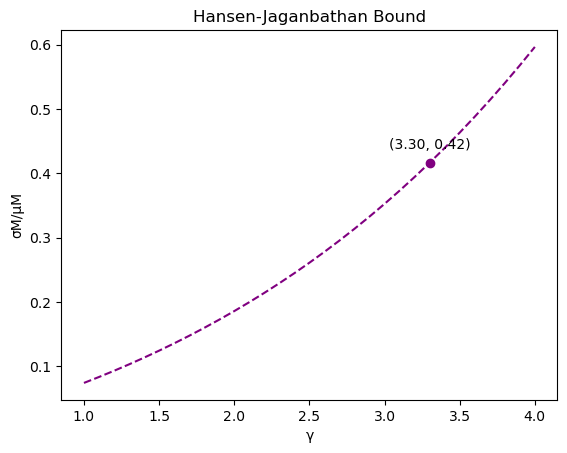

In [36]:
df_m_s = pd.DataFrame(list_m_s)
df_m_s = df_m_s[df_m_s>0.4]
df_m_s = df_m_s.dropna()

x= gama[df_m_s.index[0]]
y= list_m_s[df_m_s.index[0]]
coordinate = f"({x:.2f}, {y:.2f})"
plt.plot(gama,list_m_s,color="purple",linestyle="--")
plt.scatter(gama[df_m_s.index[0]],list_m_s[df_m_s.index[0]], color='purple', marker='o', label='Point (0, 1.13)')
plt.annotate(coordinate, 
             (x, y),
             textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('γ')
plt.ylabel('σM/μM')
plt.title('Hansen-Jaganbathan Bound')

plt.show()

## Behavioural Finance
### <font color = brown> Assume Barberis, Huang, and Santos economy where investor receives utility from consumption as well as recent financial gain or loss. Use these parameters:
### <font color = brown>Consumption growth has lognormal distribution:
### <font color = brown> Rf = 1.0303, x = 1+D/P, and define error term, utility from recent financial gain or loss 
### <font color = brown> Solve for e(x) = 0 to find equilibrium value of x, using bisection search:
> Set x– = 1 and x+ = 1.1, and use simulated distribution of consumption growth to confirm that e(x–) < 0 and e(x+) > 0 ⇒ solution must lie between x– and x+\
Set x0 = 0.5*(x– + x+) and use simulated distribution of consumption growth to calculate e(x0)\
If |e(x0)| < 10–5, then you have converged to solution\
Otherwise if e(x0)< 0, then solution lies between x0 and x+ ⇒ repeat from step 2 with x– = x0\
Otherwise if e(x0) > 0, then solution lies between x– and x0 ⇒ repeat from step 2 with x+ = x0

In [37]:
delta = 0.99
gama  = 1
lamda = 2

rf = 1.0303
b0 = np.arange(0,10.1,0.1)
def consumption_growth(fois = 10000):
    epsilon = np.random.standard_normal(fois)
    g=[]
    for i in range(fois):
        g.append(np.exp(0.02 + 0.02 * epsilon[i]))
    return g     
list_g = consumption_growth(10000)
list_g = np.array(list_g)
def vR(x):
    utility = []
    for i in range(len(list_g)):
        if x * list_g[i] >= rf:
            utility.append(x * list_g[i] - rf)
        else:
            utility.append(2 * (x*list_g[i] - rf))
    expected_utility = np.mean(utility)
    return expected_utility
def error_term(x,i):
    return 0.99*b0[i]*vR(x)+0.99*x-1
list_x0=[]
for i in range(len(b0)):
    x1 = 1   # here we set the value of x- and x+
    x2 = 1.1
    x0 = (x1 + x2) / 2

    while abs(error_term(x0,i)) >= 10**(-5):
        if error_term(x0,i) < 0 :
            x1 = x0
        elif error_term(x0,i) > 0 :
            x2 = x0
        x0 = (x1 + x2) / 2
    else:
        x_s = x0
        
    list_x0.append(x_s)
# list_x0

### <font color = brown>Calculate price-dividend ratio for market portfolio, Plot price-dividend ratio (on vertical axis) vs b0.

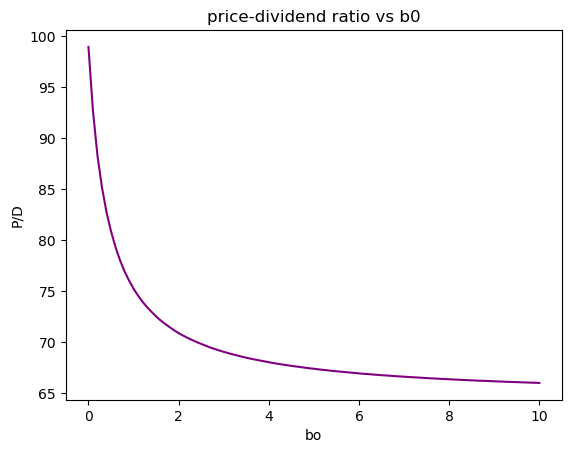

In [38]:
list_x0 = np.array(list_x0)
P_D = 1/(list_x0-1)

plt.plot(b0,P_D,color="purple")

plt.xlabel('bo')
plt.ylabel('P/D')
plt.title('price-dividend ratio vs b0')

plt.show()

### <font color = brown> Calculate expected market return,

In [39]:
def R_M(x,list_g):
    list_g = np.array(list_g)
    return np.mean(x*list_g)
list_rm = []
for i in range(len(list_x0)):
    list_g = np.array(list_g)
    list_rm.append(R_M(list_x0[i],list_g))
# list_rm

### <font color = brown> Plot equity premium (on vertical axis) vs b0.

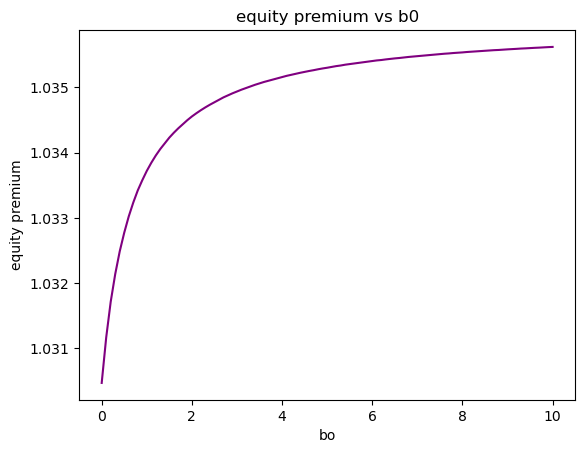

In [40]:
plt.plot(b0,list_rm,color="purple")

plt.xlabel('bo')
plt.ylabel('equity premium')
plt.title('equity premium vs b0')

plt.show()

### <font color = brown>Briefly explain main characteristics of v(∙) (which is utility function to measure utility from recent financial gain or loss), as well as economic significance of b0 and λ:
> Utility function to measure utility from recent financial gain or loss is based on prospect theory, where financial gain or loss is measured relative to reference level based on risk-free rate\
    Investor is more sensitive to financial loss, and λ determines degree of loss aversion\
    b0 determines extent to which utility from recent financial gain or loss contributes to investor's overall lifetime utility

## OLS (e.g. Three factor)
> First thing first, you should get the columns by yourself

In [41]:
# First thing first, you should get the columns by yourself
df =  pd.read_excel("Industry_Portfolios.xlsx") 
df_Rf =  pd.read_excel("Risk_Factors.xlsx") 
df['Ri-Rf']=df.iloc[:, 1:].mean(axis=1) -df_Rf['Rf']
Y =df['Ri-Rf']  # 因变量

# 向自变量添加一个常数列作为截距
X1 = df_Rf['Rm-Rf']
X2 = df_Rf['SMB']
X3 = df_Rf['HML']

X = sm.add_constant(pd.concat([X1, X2, X3], axis=1))

# 使用sm.OLS来拟合线性回归模型
model = sm.OLS(Y, X)

# 拟合模型
results = model.fit()

# 打印回归结果摘要
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ri-Rf   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2459.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          8.78e-105
Time:                        23:34:03   Log-Likelihood:                -93.691
No. Observations:                 120   AIC:                             195.4
Df Residuals:                     116   BIC:                             206.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1307      0.050      2.635      0.0

D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
D:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [42]:
alpha = results.params['const']

# 打印 alpha（截距）
print("Alpha (Intercept):", alpha)

Alpha (Intercept): 0.13068112782140073
